In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import sys
sys.path.append("..")
from src.config import Start_Date, End_Date, Stock_Universe, Market_Index

In [2]:
# We ONLY use Adjusted Close
# The adjusted close is a stock's closing price modified to account for corporate actions like dividends, stock splits, and rights offerings, providing a more accurate historical view of its true value and performance over time
# yfinance now provides auto-adjusted prices by default, so the Close prices already account for dividends and splits.

prices = yf.download(
    Stock_Universe,
    start = Start_Date,
    end = End_Date,
    progress = False
)
# Each row is one trading day in stock market
# 80 Colums because we have 16 stocks selected and 5 categories as = (close, high, low, open, volume)
prices
# type(prices) = Dataframe

# saving prices to data folder :

prices.to_csv("../data/raw/prices_raw.csv")


C:\Users\Varun Gupta\AppData\Local\Temp\ipykernel_24580\245388740.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(


In [3]:
# As our major focus is only on long term analysis, which does not require High, Open and Low values/prices of stock

prices = prices.drop(columns=['High', 'Low', 'Open'])
prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM        META         MMM  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135         NaN   42.972546  ...   
2010-01-05   15.498263   39.949776   29.105200         NaN   42.703388  ...   
2010-01-06   15.107573   40.274723   29.265116         NaN   43.308998  ...   
2010-01-07   14.755876   39.987259   29.844816         NaN   43.340057  ...   
2010-01-08   14.952587   40.124741   29.771532         NaN   43.645443  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  597.964355  126.589981  ...   
2024-12-24  195.344955  141.518036  237.286880  605.839600  127.944420  ...   
2024-12-26  194.836945  141.256042  238.099686  601.453430  128.749207  ...   
2024-12-27  192.008011  140.741791  236.170517  597.924561  127.767731  ...   
2024-12-30  190.493942  139.082565  234.358871  589.381409  126.737198  ...   

Price         Volume                                                     \
Ticker           JNJ       JPM        META      MMM      MSFT       PFE   
Date                                                                      
2010-01-04   9506200  35460500         NaN  3640265  38409100  54898644   
2010-01-05  10673100  41208300         NaN  3405012  49749600  45714931   
2010-01-06  13171500  27729000         NaN  6301126  58182400  43640975   
2010-01-07  10901600  44864700         NaN  5346240  50559700  41557112   
2010-01-08   7898000  33110100         NaN  4073337  51197400  32049716   
...              ...       ...         ...      ...       ...       ...   
2024-12-23   8720800   8611500  10205800.0  2067400  19152500  35350400   
2024-12-24   3164100   3729100   4726100.0   803200   7164500  19716400   
2024-12-26   4656300   4451800   6081400.0  1484900   8194200  31406000   
2024-12-27   5588300   5730200   8084200.0  1842600  18117700  35218300   
2024-12-30   6268700   5723800   7025900.0  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 32 columns]

In [4]:
# Stocks = individual risk
# Benchmark = market risk
# Benchmark : A reference market index used to compare your stocks or portfolio against the overall market.
# Here we are using S&P-500 benchmark
# benchmark = S&P 500 index data


# In case of S&P 500:
# It represents 500 large US companies together
# Weighted by company size (market cap)
# So instead of tracking 500 stocks one by one:
# The index gives one summary number

In [5]:
benchmark = yf.download(
    Market_Index,
    start= Start_Date,
    end = End_Date,
    progress = False
)
# type(benchmark) = Dataframe
benchmark
# Each row shows the value of the S&P 500 index on that day
# An index is: A single number that represents the combined performance of many companies.

# Saving benchmark to data folder :

benchmark.to_csv("../data/raw/benchmark_raw.csv")

C:\Users\Varun Gupta\AppData\Local\Temp\ipykernel_24580\2482586232.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download(


In [6]:
# benchmark = benchmark.drop(columns=[('^GSPC', 'Open'),('^GSPC', 'High'),('^GSPC', 'Low')])
# benchmark
# This gives error because : 
# MultiIndex requires exact tuple match
# Your assumption about level order is wrong
# yfinance output is not stable across versions

# Droping a level because it is a multi index column dataframe
benchmark.columns = benchmark.columns.droplevel(1)


In [7]:
benchmark.columns
benchmark

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


In [8]:
benchmark = benchmark.drop(columns=['Open','High', 'Low'])

In [9]:
benchmark

Price,Close,Volume
Date,,
2010-01-04,1132.989990,3991400000
2010-01-05,1136.520020,2491020000
2010-01-06,1137.140015,4972660000
2010-01-07,1141.689941,5270680000
2010-01-08,1144.979980,4389590000
...,...,...
2024-12-23,5974.069824,3593280000
2024-12-24,6040.040039,1757720000
2024-12-26,6037.589844,2904530000


In [10]:
# Date Alignment : 
# Making sure that stocks data and benchmark data have the exact same dates, in the same order, with no extra or missing days.

prices.index = pd.to_datetime(prices.index)
benchmark.index = pd.to_datetime(benchmark.index)

In [11]:
# Align by common dates : 

common_dates = prices.index.intersection(benchmark.index)
prices = prices.loc[common_dates]
benchmark = benchmark.loc[common_dates]

In [12]:
prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM        META         MMM  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135         NaN   42.972546  ...   
2010-01-05   15.498263   39.949776   29.105200         NaN   42.703388  ...   
2010-01-06   15.107573   40.274723   29.265116         NaN   43.308998  ...   
2010-01-07   14.755876   39.987259   29.844816         NaN   43.340057  ...   
2010-01-08   14.952587   40.124741   29.771532         NaN   43.645443  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  597.964355  126.589981  ...   
2024-12-24  195.344955  141.518036  237.286880  605.839600  127.944420  ...   
2024-12-26  194.836945  141.256042  238.099686  601.453430  128.749207  ...   
2024-12-27  192.008011  140.741791  236.170517  597.924561  127.767731  ...   
2024-12-30  190.493942  139.082565  234.358871  589.381409  126.737198  ...   

Price         Volume                                                     \
Ticker           JNJ       JPM        META      MMM      MSFT       PFE   
Date                                                                      
2010-01-04   9506200  35460500         NaN  3640265  38409100  54898644   
2010-01-05  10673100  41208300         NaN  3405012  49749600  45714931   
2010-01-06  13171500  27729000         NaN  6301126  58182400  43640975   
2010-01-07  10901600  44864700         NaN  5346240  50559700  41557112   
2010-01-08   7898000  33110100         NaN  4073337  51197400  32049716   
...              ...       ...         ...      ...       ...       ...   
2024-12-23   8720800   8611500  10205800.0  2067400  19152500  35350400   
2024-12-24   3164100   3729100   4726100.0   803200   7164500  19716400   
2024-12-26   4656300   4451800   6081400.0  1484900   8194200  31406000   
2024-12-27   5588300   5730200   8084200.0  1842600  18117700  35218300   
2024-12-30   6268700   5723800   7025900.0  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 32 columns]

In [13]:
benchmark

Price,Close,Volume
Date,,
2010-01-04,1132.989990,3991400000
2010-01-05,1136.520020,2491020000
2010-01-06,1137.140015,4972660000
2010-01-07,1141.689941,5270680000
2010-01-08,1144.979980,4389590000
...,...,...
2024-12-23,5974.069824,3593280000
2024-12-24,6040.040039,1757720000
2024-12-26,6037.589844,2904530000


In [14]:
# Now, we check for missing values in the dataframe : 

prices.isna().any()

Price   Ticker
Close   AAPL      False
        AMZN      False
        BAC       False
        CAT       False
        CVX       False
        GOOGL     False
        JNJ       False
        JPM       False
        META       True
        MMM       False
        MSFT      False
        PFE       False
        PG        False
        WFC       False
        WMT       False
        XOM       False
Volume  AAPL      False
        AMZN      False
        BAC       False
        CAT       False
        CVX       False
        GOOGL     False
        JNJ       False
        JPM       False
        META       True
        MMM       False
        MSFT      False
        PFE       False
        PG        False
        WFC       False
        WMT       False
        XOM       False
dtype: bool

In [15]:
# Now checking how many missing values are there : 
prices.isna().sum()

Price   Ticker
Close   AAPL        0
        AMZN        0
        BAC         0
        CAT         0
        CVX         0
        GOOGL       0
        JNJ         0
        JPM         0
        META      599
        MMM         0
        MSFT        0
        PFE         0
        PG          0
        WFC         0
        WMT         0
        XOM         0
Volume  AAPL        0
        AMZN        0
        BAC         0
        CAT         0
        CVX         0
        GOOGL       0
        JNJ         0
        JPM         0
        META      599
        MMM         0
        MSFT        0
        PFE         0
        PG          0
        WFC         0
        WMT         0
        XOM         0
dtype: int64

In [16]:
# Above data shows that only Meta will have missing values and which is also in very greater extent,
# so dropping Meta is more feasible option right now

# 🔹 WHY META HAS SO MANY MISSING VALUES (VERY IMPORTANT)
# This is NOT random and NOT a Yahoo Finance bug.
# The real reason:
# META was previously called Facebook (ticker: FB)
# The ticker META started trading only after the name change.

In [17]:
benchmark.isna().any()

Price
Close     False
Volume    False
dtype: bool

In [18]:
# Hence we dont have any missing value in benchmark

In [19]:
# Removing Meta column from multiindexing columns :

prices = prices.drop(columns='META', level='Ticker')


In [20]:
'META' in prices.columns.get_level_values('Ticker')


False

In [21]:
prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM         MMM        MSFT  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135   42.972546   23.130053  ...   
2010-01-05   15.498263   39.949776   29.105200   42.703388   23.137526  ...   
2010-01-06   15.107573   40.274723   29.265116   43.308998   22.995537  ...   
2010-01-07   14.755876   39.987259   29.844816   43.340057   22.756392  ...   
2010-01-08   14.952587   40.124741   29.771532   43.645443   22.913315  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  126.589981  432.062744  ...   
2024-12-24  195.344955  141.518036  237.286880  127.944420  436.112885  ...   
2024-12-26  194.836945  141.256042  238.099686  128.749207  434.901794  ...   
2024-12-27  192.008011  140.741791  236.170517  127.767731  427.377319  ...   
2024-12-30  190.493942  139.082565  234.358871  126.737198  421.719055  ...   

Price          Volume                                                   \
Ticker          GOOGL       JNJ       JPM      MMM      MSFT       PFE   
Date                                                                     
2010-01-04   78169752   9506200  35460500  3640265  38409100  54898644   
2010-01-05  120067812  10673100  41208300  3405012  49749600  45714931   
2010-01-06  158988852  13171500  27729000  6301126  58182400  43640975   
2010-01-07  256315428  10901600  44864700  5346240  50559700  41557112   
2010-01-08  188783028   7898000  33110100  4073337  51197400  32049716   
...               ...       ...       ...      ...       ...       ...   
2024-12-23   25675000   8720800   8611500  2067400  19152500  35350400   
2024-12-24   10403300   3164100   3729100   803200   7164500  19716400   
2024-12-26   12046600   4656300   4451800  1484900   8194200  31406000   
2024-12-27   18891400   5588300   5730200  1842600  18117700  35218300   
2024-12-30   14264700   6268700   5723800  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 30 columns]

In [22]:
prices.isna().any()

Price   Ticker
Close   AAPL      False
        AMZN      False
        BAC       False
        CAT       False
        CVX       False
        GOOGL     False
        JNJ       False
        JPM       False
        MMM       False
        MSFT      False
        PFE       False
        PG        False
        WFC       False
        WMT       False
        XOM       False
Volume  AAPL      False
        AMZN      False
        BAC       False
        CAT       False
        CVX       False
        GOOGL     False
        JNJ       False
        JPM       False
        MMM       False
        MSFT      False
        PFE       False
        PG        False
        WFC       False
        WMT       False
        XOM       False
dtype: bool

In [23]:
# Sucessfully removed the missing values.

In [24]:
# WHAT IS “LIQUIDITY”?
# Liquidity means: How easily a stock can be bought or sold without changing its price much.
# In simple words:
# High liquidity → many buyers & sellers
# Low liquidity → very few trades

# Example :

#* Apple (AAPL):
#& Millions of shares traded daily → high liquidity

#* Small unknown stock:
#& Few thousand shares traded → low liquidity

In [25]:
# WHY LIQUIDITY MATTERS IN FINANCE ?

# Low liquidity causes fake signals.

# If a stock is illiquid:
# price jumps randomly
# volatility looks high (but it’s fake)
# drawdowns look scary (but unreal)
# returns look unstable

In [26]:
# LIQUIDITY SANITY CHECK

# WHAT IS A “LIQUIDITY SANITY CHECK”?
# Liquidity sanity check means:
# A basic verification that all stocks in your dataset are reasonably liquid.

In [27]:
# WHY THIS STEP IS NECESSARY EVEN FOR S&P 500 STOCKS
# Answer: Most S&P 500 stocks are liquid

# But:
# volume can be inconsistent
# some stocks trade much less than others
# data glitches happen

In [28]:
# WHAT EXACTLY DO WE CHECK :

# ✅ 1. Average trading volume : Is it consistently high?(For each stock, look at :
#  Average daily trading volume over the full period)
# 🔹 WHY :
# High average volume = easy to buy/sell
# Low average volume = fake volatility, risky exits


# ✅ 2. Volume stability : Does volume suddenly drop to near zero for long periods?(Look at volume behavior across time, not just average.)
# 🔹 WHY : Some stocks: Trade normally, then suddenly stop trading for months then resume



# ✅ 3. Extreme illiquidity days : Are there many days with almost no trading?
# 🔹 WHAT TO CHECK :
# Look for days where:
# volume is almost zero or suddenly collapses repeatedly

# 🔹 WHY
# These days create:
# artificial price jumps
# fake risk spikes
# misleading drawdowns


# 🔹 FINAL DECISION RULE (LOCK THIS)
# If a stock fails any TWO of the three checks → remove it.
# Why two?
# One anomaly can happen
# Two signals mean structural issue
# This rule is simple and professional.

In [29]:
benchmark

Price,Close,Volume
Date,,
2010-01-04,1132.989990,3991400000
2010-01-05,1136.520020,2491020000
2010-01-06,1137.140015,4972660000
2010-01-07,1141.689941,5270680000
2010-01-08,1144.979980,4389590000
...,...,...
2024-12-23,5974.069824,3593280000
2024-12-24,6040.040039,1757720000
2024-12-26,6037.589844,2904530000


In [30]:
prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM         MMM        MSFT  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135   42.972546   23.130053  ...   
2010-01-05   15.498263   39.949776   29.105200   42.703388   23.137526  ...   
2010-01-06   15.107573   40.274723   29.265116   43.308998   22.995537  ...   
2010-01-07   14.755876   39.987259   29.844816   43.340057   22.756392  ...   
2010-01-08   14.952587   40.124741   29.771532   43.645443   22.913315  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  126.589981  432.062744  ...   
2024-12-24  195.344955  141.518036  237.286880  127.944420  436.112885  ...   
2024-12-26  194.836945  141.256042  238.099686  128.749207  434.901794  ...   
2024-12-27  192.008011  140.741791  236.170517  127.767731  427.377319  ...   
2024-12-30  190.493942  139.082565  234.358871  126.737198  421.719055  ...   

Price          Volume                                                   \
Ticker          GOOGL       JNJ       JPM      MMM      MSFT       PFE   
Date                                                                     
2010-01-04   78169752   9506200  35460500  3640265  38409100  54898644   
2010-01-05  120067812  10673100  41208300  3405012  49749600  45714931   
2010-01-06  158988852  13171500  27729000  6301126  58182400  43640975   
2010-01-07  256315428  10901600  44864700  5346240  50559700  41557112   
2010-01-08  188783028   7898000  33110100  4073337  51197400  32049716   
...               ...       ...       ...      ...       ...       ...   
2024-12-23   25675000   8720800   8611500  2067400  19152500  35350400   
2024-12-24   10403300   3164100   3729100   803200   7164500  19716400   
2024-12-26   12046600   4656300   4451800  1484900   8194200  31406000   
2024-12-27   18891400   5588300   5730200  1842600  18117700  35218300   
2024-12-30   14264700   6268700   5723800  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 30 columns]

In [31]:
# ✅ 1. Average trading volume

avg_volume = prices['Volume'].mean()              # series format
avg_volume_df = avg_volume.to_frame()             # dataframe format 

In [32]:
avg_volume
avg_volume_df

,0
Ticker,
AAPL,2.299696e+08
AMZN,8.323159e+07
BAC,9.650742e+07
CAT,5.127551e+06
CVX,8.250502e+06
GOOGL,5.618274e+07
JNJ,8.680439e+06
JPM,1.927214e+07
MMM,3.675800e+06


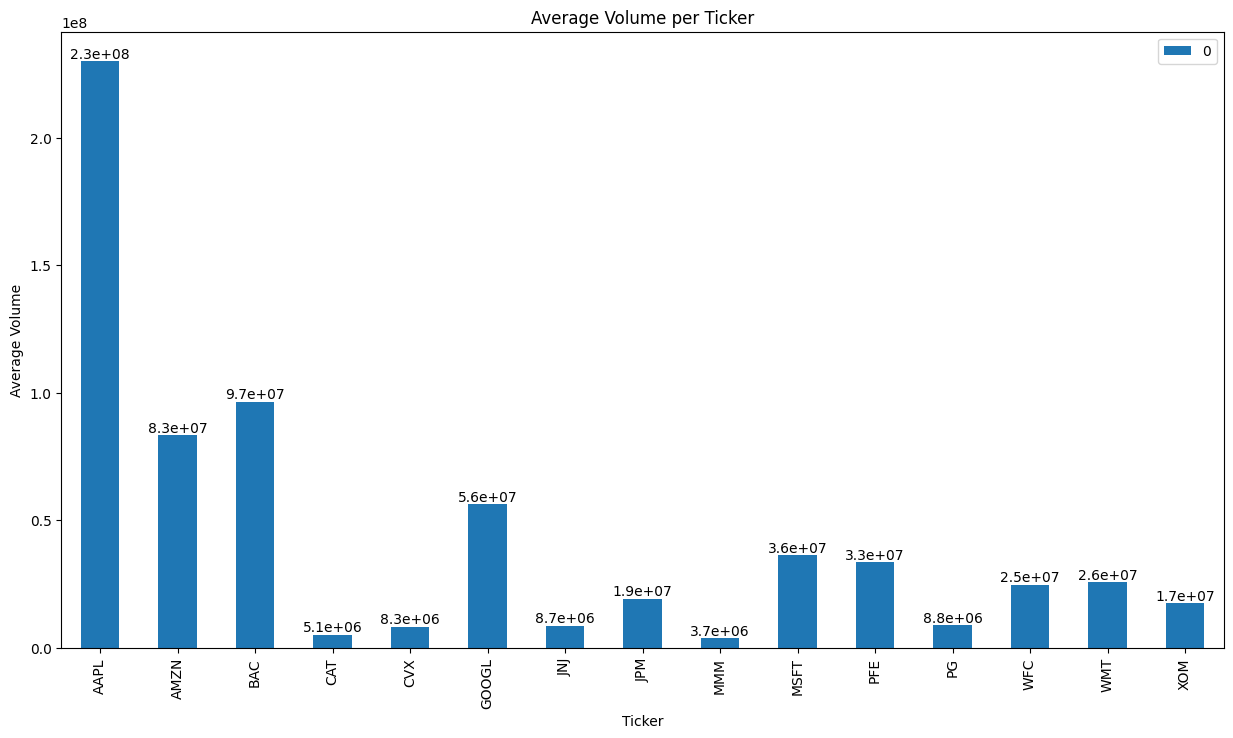

In [33]:
ax = avg_volume_df.plot(kind='bar', figsize=(15, 8))
ax.bar_label(ax.containers[0], fmt='%.1e')
plt.title("Average Volume per Ticker")
plt.ylabel("Average Volume")
plt.show()


# We are not going to use any statistical methods here because we don't want any kind of outlier here,
# we want the stock having teh lowest liquidity, to remove, using any statistical method, may remove 
# very high liquidity stocks as well

In [34]:
# computed average daily volume per stock

# 🔹 Very High Liquidity (Top Tier)
# AAPL → ~230 million
# BAC → ~97 million
# AMZN → ~83 million
# These are ultra-liquid. No question.


# 🔹 High Liquidity (Very Safe)
# GOOGL → ~56 million
# MSFT → ~36 million
# PFE → ~33 million
# Absolutely fine.


# 🔹 Medium Liquidity (Still Institutional-Safe)
# WFC → ~25 million
# WMT → ~26 million
# JPM → ~19 million
# XOM → ~17 million
# These are normal large-cap volumes.


# 🔹 Lower Liquidity (But Still Acceptable)
# JNJ → ~8.7 million
# PG → ~8.7 million
# CVX → ~8.2 million
# These are defensive / energy / consumer stocks.
# Lower volume is expected, not a problem.

# 🔹 Lowest Liquidity (But IMPORTANT DETAIL)
# CAT → ~5.1 million
# MMM → ~3.6 million
# This is NOT illiquid
# Pension funds and mutual funds trade these stocks daily.

#& For CAT & MMM : 
#* If you remove them:
# You bias your universe toward tech & banks
# You lose sector balance
# You weaken risk analysis
# Interviewer may question judgement

#* Keeping them:
# Preserves realistic market mix
# Improves drawdown & allocation analysis
# Shows mature judgement

# Final verdict : 
# Although trading volumes varied across sectors, 
# all assets exhibited sufficient daily liquidity for institutional-level analysis. 
# No stocks were excluded based on average volume alone.

In [35]:
# ✅ 2. Volume stability over time : Does the stock trade regularly across time, or does trading disappear for long periods?

volume = prices['Volume']    # In this a DataFrame having row index as Dates, column index as Ticker and values as volume
(volume == 0).sum()          # For each ticker, it counts how many time volume is zero. 

Ticker
AAPL     0
AMZN     0
BAC      0
CAT      0
CVX      0
GOOGL    0
JNJ      0
JPM      0
MMM      0
MSFT     0
PFE      0
PG       0
WFC      0
WMT      0
XOM      0
dtype: int64

In [36]:
# According to above result means volume kisi bhi stock ki kabhi bhi zero nhi hui hai 
# means volume is stable over time

volume.isna().sum()

Ticker
AAPL     0
AMZN     0
BAC      0
CAT      0
CVX      0
GOOGL    0
JNJ      0
JPM      0
MMM      0
MSFT     0
PFE      0
PG       0
WFC      0
WMT      0
XOM      0
dtype: int64

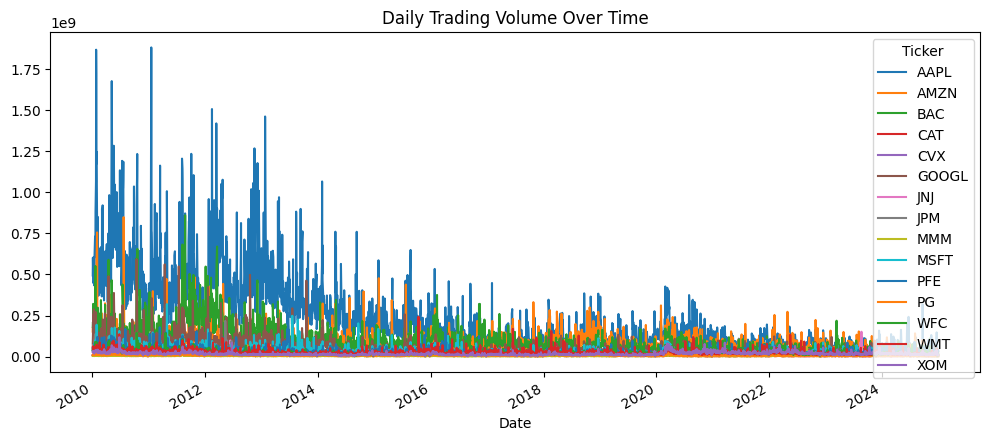

In [37]:
volume.plot(figsize=(12,5))
plt.title("Daily Trading Volume Over Time")
plt.show()


In [38]:
# ✅ 3. Extreme illiquidity days

# Check-3 ye dekhta hai ki kahin aise din to nahi hain jahan stock “technically trade hua”, 
# lekin practically koi trade hi nahi hua.

# Tum already do cheezein check kar chuke ho:
# Check-1: Average volume achha hai
# Check-2: Zero-volume days nahi hain

# Phir bhi ek rare case bachta hai 
# Rare but dangerous case:
# Volume kabhi-kabhi almost zero ke paas chala jata hai
# Zero nahi, par effectively useless

# Is din:
# price jump fake hota hai
# volatility fake hoti hai
# drawdown fake hota hai
# Isliye Check-3 exist karta hai.

In [39]:
volume = prices['Volume']
rolling_median_vol = volume.rolling(window=20).median()    # Har din ke liye, pichhle kuch fixed din ka data leke calculation karna.
#  We used median, because it does not get destorted with spikes
volume_ratio = volume / rolling_median_vol
Extreme_Threshold = 0.1   # 10% of normal volume
extreme_illiquidity = volume_ratio < Extreme_Threshold
extreme_days_count = extreme_illiquidity.sum()
extreme_days_count

Ticker
AAPL     0
AMZN     0
BAC      0
CAT      0
CVX      0
GOOGL    0
JNJ      0
JPM      0
MMM      0
MSFT     0
PFE      0
PG       0
WFC      0
WMT      0
XOM      0
dtype: int64

In [40]:
# Volume distributions are highly skewed due to event-driven spikes,
# so I use a rolling median rather than mean to establish a robust baseline for liquidity analysis.

In [41]:
# Fama–French Data Library :
# The Fama–French Data Library is an online repository of 
# asset-pricing research data maintained by Kenneth R. French, 
# it provides widely used factor and portfolio returns that underpin many empirical finance studies.

# The library grew out of research on the Fama–French three-factor model, 
# which extends CAPM using market, size (SMB), and value (HML) factors. 

# Internet se Fama–French ka ZIP uthana → memory me open karna → CSV nikalna → pandas DataFrame banana

In [42]:
# Getting Fama-French data : 

import requests            # use to download files from internet
import io                  # use to handle file in memory(RAM)
import zipfile             # use to open ZIP file

In [43]:
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip'

response = requests.get(url)

In [44]:
with zipfile.ZipFile(io.BytesIO(response.content)) as z :          # this is used to open zip in memory
    print(z.namelist())

# response.content → raw bytes (ZIP file)
# io.BytesIO(...) → bytes ko file-like object bana deta hai
# zipfile.ZipFile(...) → ZIP ko open karta hai without extracting
# z.namelist() → ZIP ke andar kaun-kaun si files hain

['F-F_Research_Data_Factors_daily.csv']


In [45]:
# reading CSV inside ZIP file : 

with zipfile.ZipFile(io.BytesIO(response.content)) as z :
    with z.open(z.namelist()[0]) as f :
        ff_factor = pd.read_csv(f, skiprows=3)

ff_factor

# Savng ff_factor to data folder : 

ff_factor.to_csv("../data/raw/ff_factor_raw.csv")


In [46]:
# skiprows=3 kyun?
# 📌 Fama–French CSV structure:
# This file was created by...
# Kenneth R. French
# Date,Mkt-RF,SMB,HML,RF
# 19260701,0.10,-0.25,...

# Top 3 rows = text / metadata, data nahi
# Isliye skip karte hain.

In [47]:
ff_factor.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# In this csv file the first name of the column is unnamed: 0 which is date, so we renamed it 

In [48]:
ff_factor['Date'] = pd.to_datetime(ff_factor['Date'], errors='coerce')

In [49]:
ff_factor = ff_factor.dropna(subset=['Date'])


In [50]:
ff_factor['Date'] = pd.to_datetime(ff_factor['Date'], format='%Y%m%d')

In [51]:
ff_factor.set_index('Date', inplace=True)

In [52]:
ff_factor

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.09,-0.25,-0.27,0.01
1926-07-02,0.45,-0.33,-0.06,0.01
1926-07-06,0.17,0.30,-0.39,0.01
1926-07-07,0.09,-0.58,0.02,0.01
1926-07-08,0.22,-0.38,0.19,0.01
...,...,...,...,...
2025-10-27,1.17,-0.56,-1.21,0.02
2025-10-28,0.18,-0.34,-0.61,0.02
2025-10-29,-0.09,-0.91,-0.81,0.02


In [53]:
ff_factor = ff_factor.apply(pd.to_numeric)


In [54]:
ff_factor

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.09,-0.25,-0.27,0.01
1926-07-02,0.45,-0.33,-0.06,0.01
1926-07-06,0.17,0.30,-0.39,0.01
1926-07-07,0.09,-0.58,0.02,0.01
1926-07-08,0.22,-0.38,0.19,0.01
...,...,...,...,...
2025-10-27,1.17,-0.56,-1.21,0.02
2025-10-28,0.18,-0.34,-0.61,0.02
2025-10-29,-0.09,-0.91,-0.81,0.02


In [55]:
common_dates = prices.index.intersection(ff_factor.index)

prices = prices.loc[common_dates]
ff_factor = ff_factor.loc[common_dates]


In [56]:
ff_factor

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-04,1.69,0.61,1.14,0.00
2010-01-05,0.31,-0.64,1.22,0.00
2010-01-06,0.13,-0.23,0.55,0.00
2010-01-07,0.40,0.09,0.96,0.00
2010-01-08,0.33,0.36,0.02,0.00
...,...,...,...,...
2024-12-23,0.61,-0.71,-0.20,0.02
2024-12-24,1.11,-0.09,-0.06,0.02
2024-12-26,0.01,1.04,-0.18,0.02


In [57]:
# “Data preparation phase complete.”

In [62]:
# Freezing of data : 

# Final cleaned prices
prices.to_csv("../data/processed/prices_final.csv", index=True)
benchmark.to_csv("../data/processed/benchmark_final.csv", index=True)
ff_factor.to_csv("../data/processed/ff_factor_final.csv", index=True)


In [61]:
prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM         MMM        MSFT  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135   42.972546   23.130053  ...   
2010-01-05   15.498263   39.949776   29.105200   42.703388   23.137526  ...   
2010-01-06   15.107573   40.274723   29.265116   43.308998   22.995537  ...   
2010-01-07   14.755876   39.987259   29.844816   43.340057   22.756392  ...   
2010-01-08   14.952587   40.124741   29.771532   43.645443   22.913315  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  126.589981  432.062744  ...   
2024-12-24  195.344955  141.518036  237.286880  127.944420  436.112885  ...   
2024-12-26  194.836945  141.256042  238.099686  128.749207  434.901794  ...   
2024-12-27  192.008011  140.741791  236.170517  127.767731  427.377319  ...   
2024-12-30  190.493942  139.082565  234.358871  126.737198  421.719055  ...   

Price          Volume                                                   \
Ticker          GOOGL       JNJ       JPM      MMM      MSFT       PFE   
Date                                                                     
2010-01-04   78169752   9506200  35460500  3640265  38409100  54898644   
2010-01-05  120067812  10673100  41208300  3405012  49749600  45714931   
2010-01-06  158988852  13171500  27729000  6301126  58182400  43640975   
2010-01-07  256315428  10901600  44864700  5346240  50559700  41557112   
2010-01-08  188783028   7898000  33110100  4073337  51197400  32049716   
...               ...       ...       ...      ...       ...       ...   
2024-12-23   25675000   8720800   8611500  2067400  19152500  35350400   
2024-12-24   10403300   3164100   3729100   803200   7164500  19716400   
2024-12-26   12046600   4656300   4451800  1484900   8194200  31406000   
2024-12-27   18891400   5588300   5730200  1842600  18117700  35218300   
2024-12-30   14264700   6268700   5723800  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 30 columns]